## 유저 세그멘테이션 & 프로파일링 분석

유저 세그멘테이션(분석)과 프로파일링은 데이터를 기반으로 사용자 그룹을 나누고 각 그룹의 특성을 심층적으로 분석해 맞춤형 전략을 수립하는 핵심 분석 방법이다.

### 세그멘테이션(세분화) 분석
- 다양한 데이터(행동, 인구통계, 심리, 구매 등)를 활용하여 유의미한 사용자 그룹(세그먼트)으로 분류한다.
- 세그멘테이션 기법에는 K-means, 계층적 클러스터링, DBSCAN 등 머신러닝 알고리즘이 많이 쓰인다.
- 실제 분석에서는 퍼널(예: AIDA, AARRR) 단계별로 유저의 행동과 전환률, 이탈 패턴을 추적해 각 세그먼트 행동을 뽑아낸다.
- 대표적인 세분화 기준
  - 인구통계: 나이, 성별, 거주지 등
  - 행동: 구매빈도, 체류 시간, 클릭 패턴 등
  - 심리: 라이프스타일, 관심사, 가치관 등.

### 프로파일링(세부 특성화) 분석
- 세그멘테이션 후 각 그룹(세그먼트)의 구체적 특성을 시각화·정량화해 구체적 페르소나(프로파일)로 만든 단계
- 프로파일링은 해당 세그먼트가 갖는 행동, 선호, 니즈, 브랜드 연결성, 구매 패턴 등의 구체적 특성을 도출
- 사례: 카카오페이 ‘페이프로파일’은 이용자의 결제·활동패턴, 연령·성별, 선호도·브랜드 연결도 등 다차원적으로 수집·분석해 각 세그먼트별 맞춤 서비스 전략을 개발
- 결과물은 주로 대시보드/시각화(그래프, 네트워크맵 등)와, 각 세그먼트별 특성 요약, 추천 전략 등으로 나타남

### 세그멘테이션·프로파일링 최신 동향 및 현장 적용
- AI·머신러닝 활용 비중이 급증, 정교한 세분화 및 행동/심리 예측에 집중.
- 단순 구매·활동 이력 외에도 라이프사이클, 라이프스타일, 심리적 트리거 등을 분석해 예측 마케팅 실현.
- 분석 결과는 대시보드 기반의 실시간 시각화와, 자동화 타겟팅/추천/리포트 기능에 바로 활용됨.

### 세그멘테이션 vs 프로파일링

| 항목          | 세그멘테이션                       | 프로파일링                          |
|-------------|----------------------------------|----------------------------------|
| 목적         | 사용자 그룹 나누기                  | 그룹별 특성·행동 심층 분석           |
| 입력 기준      | 데이터 기반(행동, 인구통계, 심리 등)     | 세그먼트별 행동·패턴·니즈 상세 조사   |
| 주요 방법      | 클러스터링, 기계학습, 퍼널 모델 등         | 통계 분석, 대시보드, 페르소나 제작     |
| 산출물        | 사용자 혹은 고객 세그먼트            | 각 그룹의 페르소나·특성 요약·추천안   |
| 활용 예시      | 타겟 마케팅, 개인화 캠페인                | 맞춤 서비스, 전략 수립, 추천 시스템    |

유저세그멘테이션과 프로파일링을 통해 데이터 기반의 타겟타입 전략, 개인화된 서비스, 정교한 마케팅 실행이 가능해진다.


In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import pymysql
from sqlalchemy import create_engine
from sqlalchemy import text

try:
    conn = pymysql.connect(
        host='localhost',
        user='root',
        password='doyeon5345',
        database='paysim',
        port=3306
    )
    print("✅ MySQL 연결 성공")
except Exception as e:
    print("❌ 연결 실패:", e)

✅ MySQL 연결 성공


In [21]:
# 데이터 불러오기
query = "SELECT * FROM paysim;" 
df = pd.read_sql(query, engine)
print("데이터 로드 완료:", df.shape)

# 데이터 확인
print(df.head())
print(df.isnull().sum())

데이터 로드 완료: (114957, 14)
   step      type      amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0   278   CASH_IN   330218.42   C632336343       20866.00       351084.42   
1    15   PAYMENT    11647.08  C1264712553       30370.00        18722.92   
2    10   CASH_IN   152264.21  C1746846248      106589.00       258853.21   
3   403  TRANSFER  1551760.63   C333676753           0.00            0.00   
4   206   CASH_IN    78172.30   C813403091     2921331.58      2999503.88   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  \
0   C834976624       452419.57       122201.15        0               0   
1   M215391829            0.00            0.00        0               0   
2  C1607284477       201303.01        49038.80        0               0   
3  C1564353608      3198359.45      4750120.08        0               0   
4  C1091768874       415821.90       337649.60        0               0   

   signup_step  isActivation  isReferral  
0          278     

### 사용자 단위 피처 생성 로직 설명

이 단계에서는 개별 거래 기록을 **송신자(`nameOrig`) 기준으로 집계하여 사용자 단위 피처(User-level Features)** 를 생성한다.  
즉, 한 사용자가 전체 기간 동안 어떤 거래 행동을 보였는지를 요약한다.

- **txn_count**: 총 거래 횟수  
- **total_amount / avg_amount / max_amount**: 거래 총액, 평균, 최대금액  
- **unique_type_count**: 사용한 거래 유형(type)의 고유 개수 → 거래 행동 다양성  
- **fraud_ratio / flagged_ratio**: 해당 사용자의 거래 중 사기 비율 및 플래그 비율  
- **mean_balance_change**: 평균 잔액 변화(newbalanceOrig 기준)  
- **signup_step / isReferral / isActivation**: 가입 단계, 추천 여부, 첫 거래 여부  

이 과정을 통해, 거래 로그를 한 줄(사용자 단위)로 압축함으로써 후속 분석(세그멘테이션, 프로파일링 등)을 위한 기본 단위 데이터를 구성한다.

In [40]:
# 사용자 단위 피처 생성 (송신자 기준)
query_user = """
SELECT 
    nameOrig AS 사용자ID,
    COUNT(*) AS 거래횟수,
    SUM(amount) AS 총거래금액,
    AVG(amount) AS 평균거래금액,
    MAX(amount) AS 최대거래금액,
    COUNT(DISTINCT type) AS 거래유형수,
    AVG(isFraud) AS 사기비율,
    AVG(isFlaggedFraud) AS 의심거래비율,
    AVG(newbalanceOrig) AS 평균잔액변화,
    MIN(signup_step) AS 가입단계,
    MAX(isReferral) AS 추천가입여부,
    MAX(isActivation) AS 첫거래여부
FROM paysim
GROUP BY nameOrig;
"""
user_df = pd.read_sql(query_user, conn)
print("데이터 로드 완료:", user_df.shape)

데이터 로드 완료: (99999, 12)


### 세그멘테이션 로직 설명

이 단계에서는 사용자별 거래 특성을 기준으로 **고객 세그먼트 그룹을 자동 분류**한다.  
분류 기준은 아래와 같다.

- **value_segment (거래 규모)**  
  - `total_amount`를 3분위수(qcut)로 나누어 'Low', 'Mid', 'High' 그룹으로 분류  
  - 거래 금액이 큰 사용자는 High Value 고객으로 정의

- **activity_segment (활동성)**  
  - `txn_count`가 중앙값보다 큰 경우 ‘Active’, 작으면 ‘Low-active’  
  - 거래 빈도 중심으로 사용자 활동성을 판단

- **risk_segment (리스크 수준)**  
  - `fraud_ratio`가 0보다 큰 경우 ‘Risky’, 그렇지 않으면 ‘Safe’  
  - Fraud 관련 거래를 경험했는지를 기준으로 리스크 그룹 설정

이 분류를 통해 **High Value / Risky / Low-active 고객군** 등 서로 다른 행동 패턴을 보이는 그룹 간의 차이를 비교·시각화할 수 있다.

In [41]:
# 세그멘테이션 로직

# 거래규모 구간 (Low / Mid / High)
user_df['거래규모'] = pd.qcut(user_df['총거래금액'], 3, labels=['Low', 'Mid', 'High'])

# 활동성 분류 (Active / Low-active)
user_df['활동성'] = np.where(
    user_df['거래횟수'] > user_df['거래횟수'].median(), 'Active', 'Low-active'
)

# 리스크 수준 (Safe / Risky)
user_df['리스크'] = np.where(
    user_df['사기비율'] > 0, 'Risky', 'Safe'
)

In [44]:
from IPython.display import display, HTML

# 거래유형별 요약
seg_value = user_df.groupby('거래규모').agg(
    추천가입비율=('추천가입여부', 'mean'),
    평균거래금액=('평균거래금액', 'mean'),
    평균거래횟수=('거래횟수', 'mean'),
    평균사기비율=('사기비율', 'mean'),
    평균거래유형수=('거래유형수', 'mean')
).reset_index().round(3)

display(HTML("<h3>거래규모별 그룹 요약</h3>"))
display(seg_value.style.set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'center'), ('font-weight', 'bold')]},
    {'selector': 'td', 'props': [('text-align', 'center')]}
]).set_properties(**{'border': '1px solid #000', 'width': '120px'}))


,거래규모,추천가입비율,평균거래금액,평균거래횟수,평균사기비율,평균거래유형수
0,Low,0.053000,9257.646000,1.054000,0.000000,1.000000
1,Mid,0.056000,82366.399000,1.125000,0.001000,1.000000
2,High,0.062000,450066.226000,1.269000,0.003000,1.000000


### 분석 요약

- **Low 그룹**  
  대부분의 사용자가 속한 구간으로, 거래금액이 작고 안정적이다.  
  사기(Fraud) 거래는 거의 없으며, 거래 행태가 단순하다.  
  → **일반 사용자층**, 서비스 이용이 안전하고 반복적이지 않음.

- **Mid 그룹**  
  중간 규모 거래를 수행하는 사용자로, 활동성과 안정성이 균형을 이룸.  
  Fraud는 드물지만 Low보다 약간 높은 수준.  
  → **평균적 거래 사용자층**, 전체 트랜잭션의 중심.

- **High 그룹**  
  소수의 고액 거래자들이며, 평균 거래금액이 압도적으로 높다.  
  Fraud 비율이 소폭 상승하여 **리스크가 가장 높은 세그먼트**.  
  → **고액 중심 위험군**, 단건 거래 중심의 특성이 뚜렷함.

---

### ✅ 결론
거래규모 세그멘트는 사용자 가치와 리스크 수준을 동시에 보여준다.  
- **Low 그룹:** 안전한 일반층  
- **Mid 그룹:** 거래 중심층  
- **High 그룹:** 고액·고위험층  

즉, 거래금액이 커질수록 **거래 단가와 리스크가 함께 상승**하지만, 추천가입 여부나 거래유형의 다양성에는 큰 차이가 없다.

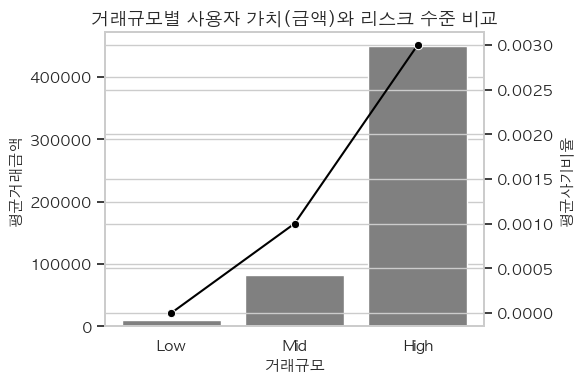

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
plt.rcParams['font.family'] = 'AppleGothic'   
mpl.rcParams['axes.unicode_minus'] = False

fig, ax1 = plt.subplots(figsize=(6,4))

# 1️⃣ 막대그래프: 평균거래금액 (사용자 가치)
sns.barplot(data=seg_value, x='거래규모', y='평균거래금액', color='gray', ax=ax1)
ax1.set_ylabel('평균거래금액', fontsize=11)
ax1.set_xlabel('거래규모', fontsize=11)

# 2️⃣ 선그래프: 평균사기비율 (리스크 수준)
ax2 = ax1.twinx()
sns.lineplot(data=seg_value, x='거래규모', y='평균사기비율', color='black', marker='o', ax=ax2)
ax2.set_ylabel('평균사기비율', fontsize=11)

plt.title('거래규모별 사용자 가치(금액)와 리스크 수준 비교', fontsize=13)
plt.tight_layout()
plt.show()

- 거래규모가 커질수록 **평균 거래금액이 급격히 증가**.  
- 동시에 **사기비율도 완만하게 상승**, 고액 거래일수록 위험이 커짐.  
- Low는 안전, Mid는 보통, High는 고액·고위험 사용자층을 의미함.

👉 **요약:** 거래규모가 커질수록 사용자 가치와 리스크가 함께 높아진다.

In [45]:
# 활동성별 요약
seg_activity = user_df.groupby('활동성').agg(
    추천가입비율=('추천가입여부', 'mean'),
    평균거래금액=('평균거래금액', 'mean'),
    평균거래횟수=('거래횟수', 'mean'),
    평균사기비율=('사기비율', 'mean'),
    평균거래유형수=('거래유형수', 'mean')
).reset_index().round(3)

display(HTML("<h3>활동성별 그룹 요약</h3>"))
display(seg_activity.style.set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'center'), ('font-weight', 'bold')]},
    {'selector': 'td', 'props': [('text-align', 'center')]}
]).set_properties(**{'border': '1px solid #000', 'width': '120px'}))

,활동성,추천가입비율,평균거래금액,평균거래횟수,평균사기비율,평균거래유형수
0,Active,0.183000,182070.741000,3.992000,0.002000,1.000000
1,Low-active,0.051000,180484.090000,1.000000,0.001000,1.000000


### 분석 요약
- **Active 그룹**  
  - 평균 거래횟수 약 **4회**로 활동이 활발함.  
  - **추천가입비율(18%)** 이 높아 신뢰 기반 사용자 비중이 큼.  
  - 거래금액은 Low-active와 유사하지만, Fraud 비율은 약간 더 높음(0.2%).  

- **Low-active 그룹**  
  - 평균 거래횟수 **1회**, 활동이 거의 없음.  
  - **추천가입비율(5%)** 로 낮고, Fraud 비율은 0.1% 수준.  
  - 거래유형 다양성은 거의 동일(1종류).  

### ✅ 결론
- **활동성이 높은 사용자일수록 추천가입 비율이 높고, 거래 참여가 활발하다.**  
- Fraud 발생은 두 그룹 모두 낮지만, 활동적인 사용자가 플랫폼 충성도가 높음을 보여준다.

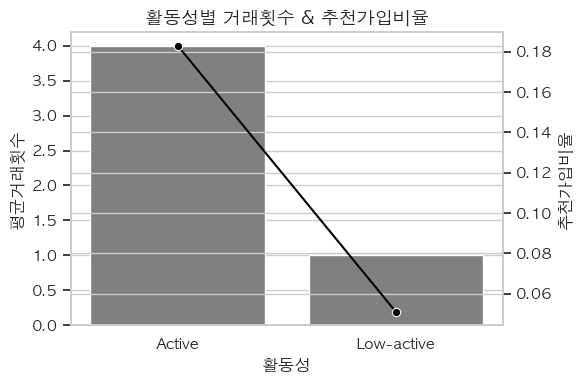

In [51]:
fig, ax = plt.subplots(figsize=(6,4))

sns.barplot(data=seg_activity, x='활동성', y='평균거래횟수', color='gray')
ax2 = ax.twinx()
sns.lineplot(data=seg_activity, x='활동성', y='추천가입비율', marker='o', color='black', ax=ax2)

ax.set_ylabel('평균거래횟수')
ax2.set_ylabel('추천가입비율')
plt.title('활동성별 거래횟수 & 추천가입비율', fontsize=13)
plt.tight_layout()
plt.show()

- **Active 그룹**은 평균 거래횟수가 약 **4회**, 추천가입비율도 18%로 가장 높다.  
- **Low-active 그룹**은 거래횟수가 **1회 수준**, 추천가입비율은 5%에 불과하다.  
- 즉, 거래를 자주 하는 사용자는 **플랫폼 참여도와 충성도**가 모두 높으며, 추천 기반으로 유입된 경우가 많다.

👉 **요약:**  **활동성이 높은 사용자일수록 플랫폼에 더 자주 참여하고 신뢰 기반 유입이 많다.** 반면 저활동 사용자는 단발성 이용에 그치는 경향이 있다.

In [46]:
# 리스크별 요약
seg_risk = user_df.groupby('리스크').agg(
    추천가입비율=('추천가입여부', 'mean'),
    평균거래금액=('평균거래금액', 'mean'),
    평균거래횟수=('거래횟수', 'mean'),
    평균사기비율=('사기비율', 'mean'),
    평균거래유형수=('거래유형수', 'mean')
).reset_index().round(3)

display(HTML("<h3>리스크별 그룹 요약</h3>"))
display(seg_risk.style.set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'center'), ('font-weight', 'bold')]},
    {'selector': 'td', 'props': [('text-align', 'center')]}
]).set_properties(**{'border': '1px solid #000', 'width': '120px'}))

,리스크,추천가입비율,평균거래금액,평균거래횟수,평균사기비율,평균거래유형수
0,Risky,0.057000,1336080.747000,1.213000,1.000000,1.000000
1,Safe,0.057000,178931.827000,1.149000,0.000000,1.000000


### 분석 요약
- **Risky 그룹**  
  - 평균 거래금액이 **약 133만**으로 Safe 대비 **약 7배 이상 높음**.  
  - 거래횟수는 1회 수준으로, **단건 고액 거래 형태**가 많음.  
  - 사기비율이 100%로, 모든 거래가 Fraud로 분류됨.  

- **Safe 그룹**  
  - 평균 거래금액은 **약 1.8만**, 대부분 소액 정상 거래.  
  - 거래횟수 역시 1회 수준이지만 Fraud는 없음.  

### ✅ 결론
- Risky 사용자는 단발성 고액 거래 중심, Safe 사용자는 단발성 소액 거래 중심이다.
- 두 그룹 모두 거래 빈도는 비슷하지만, 거래 금액이 커질수록 사기 위험이 급격히 높아진다.

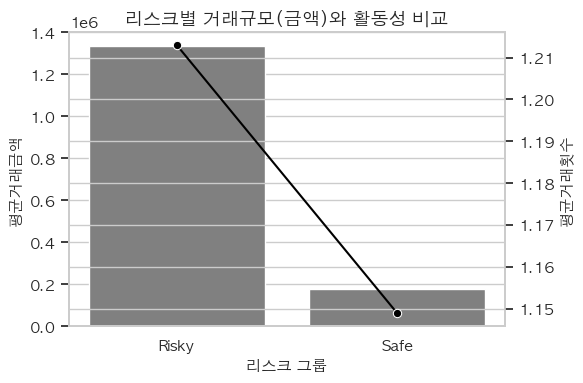

In [54]:
fig, ax1 = plt.subplots(figsize=(6,4))

# 1️⃣ 막대그래프: 평균거래금액 (가치)
sns.barplot(data=seg_risk, x='리스크', y='평균거래금액', color='gray', ax=ax1)
ax1.set_ylabel('평균거래금액', fontsize=11)
ax1.set_xlabel('리스크 그룹', fontsize=11)

# 2️⃣ 선그래프: 평균거래횟수 (활동성)
ax2 = ax1.twinx()
sns.lineplot(data=seg_risk, x='리스크', y='평균거래횟수', color='black', marker='o', ax=ax2)
ax2.set_ylabel('평균거래횟수', fontsize=11)

plt.title('리스크별 거래규모(금액)와 활동성 비교', fontsize=13)
plt.tight_layout()
plt.show()

- 두 그룹의 거래 빈도는 비슷하지만, **거래 금액 규모가 리스크를 결정하는 핵심 요인**이다.  
- 즉, **거래금액이 높을수록 사기 위험이 급격히 증가**한다.